# Preparing the Dataframe

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

In [274]:
df = pd.read_csv('breast-cancer-wisconsin-data_data.csv')

In [275]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [276]:
df = df.drop(['id', 'Unnamed: 32'], axis = 1)

In [277]:
benign = df[df['diagnosis'] == 'B']
malignant = df[df['diagnosis'] == 'M']

In [278]:
y = df['diagnosis']

In [279]:
X = df.drop(['diagnosis'], axis = 1)

# Preprocessing Tests

<AxesSubplot:>

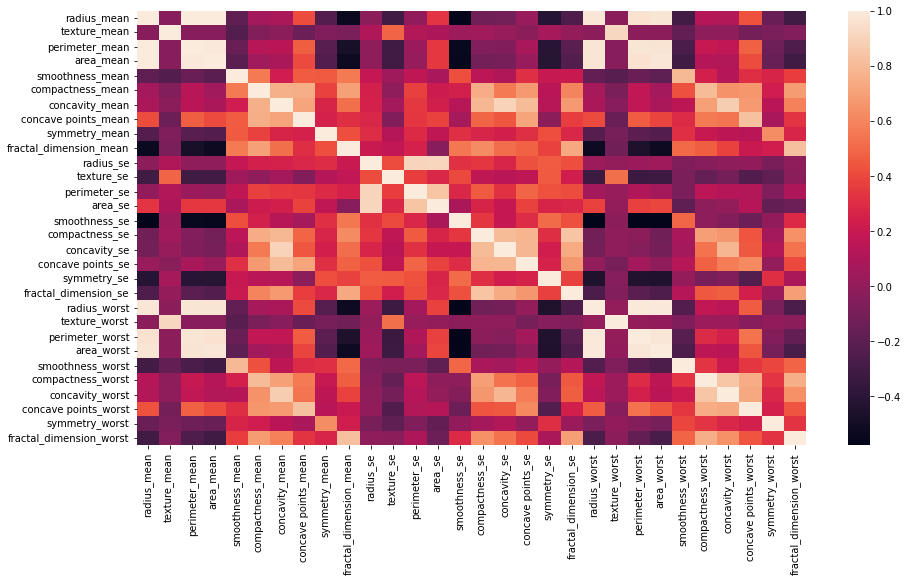

In [280]:
plt.figure(figsize=(15,8))
sns.heatmap(benign.corr())

<AxesSubplot:>

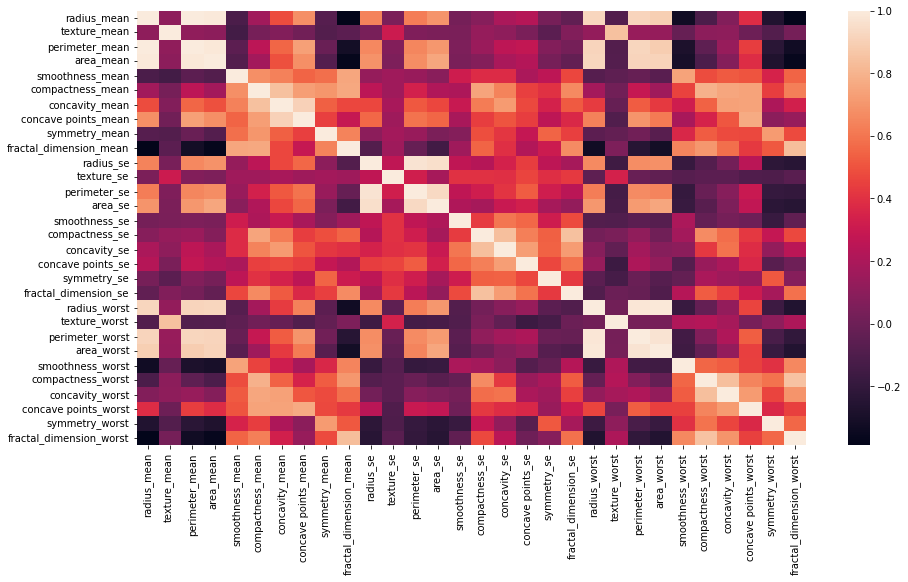

In [281]:
plt.figure(figsize=(15,8))
sns.heatmap(malignant.corr())

In [282]:
#get rid of the multicolinearity stuff and the standard errors
df = df.drop(['radius_se','texture_se', 'perimeter_se', 'area_se', 'concavity_se', 'concave points_se', 'smoothness_se', 'symmetry_se', 'compactness_se', 'fractal_dimension_se', 'radius_mean', 'radius_worst', 'perimeter_mean', 'perimeter_worst'], axis = 1)

## Visualizations

In [283]:
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

In [284]:
pca_df

,0,1
0,1160.142574,-293.917544
1,1269.122443,15.630182
2,995.793889,39.156743
3,-407.180803,-67.380320
4,930.341180,189.340742
...,...,...
564,1414.126684,110.222492
565,1045.018854,77.057589
566,314.501756,47.553525
567,1124.858115,34.129225


<AxesSubplot:xlabel='0', ylabel='1'>

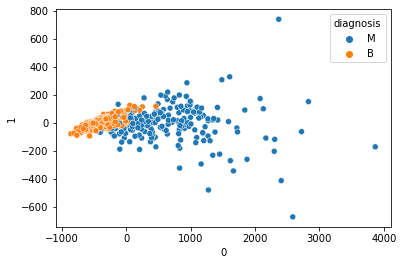

In [285]:
#reference point
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue = df['diagnosis'])

Now, I will use the means to get a sense of which values are significant.  If the results look unclear, the data point goes to round 2.

### First Round

<AxesSubplot:xlabel='0', ylabel='1'>

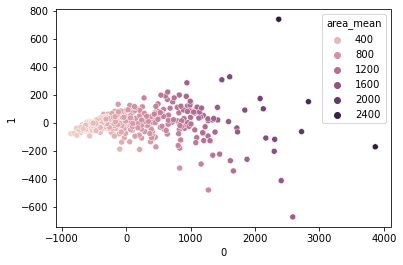

In [286]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue = df['area_mean'])

<AxesSubplot:xlabel='0', ylabel='1'>

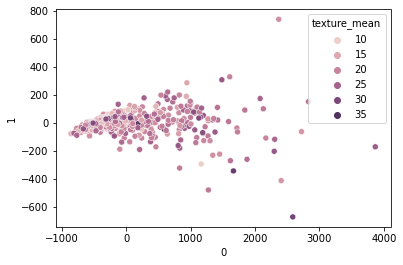

In [287]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue = df['texture_mean'])

<AxesSubplot:xlabel='0', ylabel='1'>

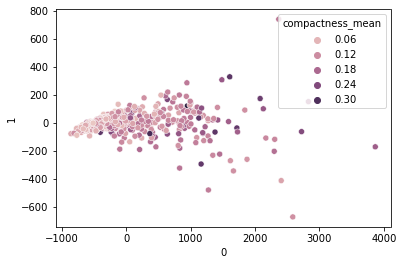

In [288]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue = df['compactness_mean'])

<AxesSubplot:xlabel='0', ylabel='1'>

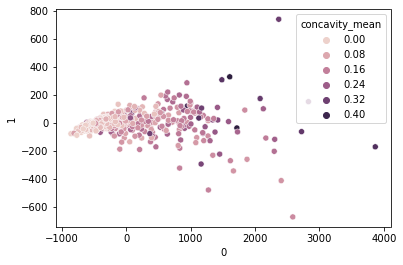

In [289]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue = df['concavity_mean'])

<AxesSubplot:xlabel='0', ylabel='1'>

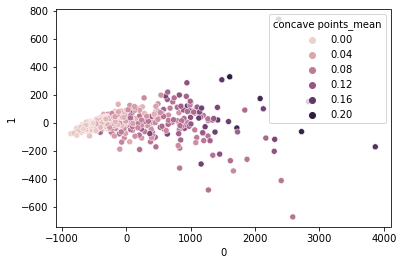

In [290]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue = df['concave points_mean'])

<AxesSubplot:xlabel='0', ylabel='1'>

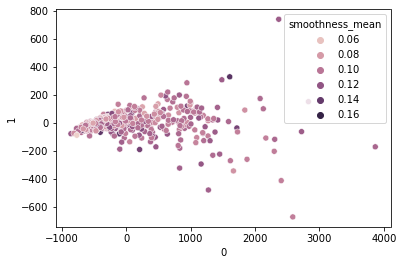

In [291]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue = df['smoothness_mean'])

<AxesSubplot:xlabel='0', ylabel='1'>

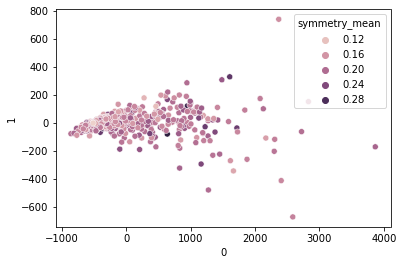

In [292]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue = df['symmetry_mean'])

<AxesSubplot:xlabel='0', ylabel='1'>

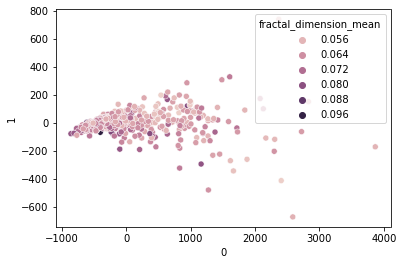

In [293]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue = df['fractal_dimension_mean'])

**Approved**: Area, Concavity, Concave Points

**Second Round**: Texture: Compactness, Smoothness, Symmetry, Fractal Dimension

### Second Round

<AxesSubplot:xlabel='0', ylabel='1'>

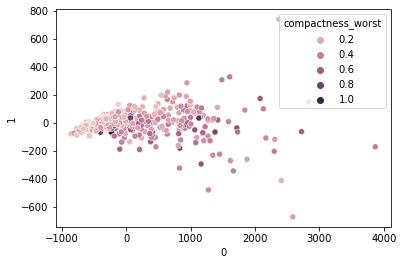

In [294]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue = df['compactness_worst'])

<AxesSubplot:xlabel='0', ylabel='1'>

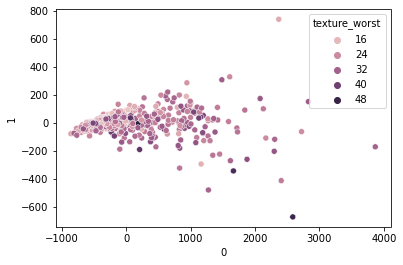

In [295]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue = df['texture_worst'])

<AxesSubplot:xlabel='0', ylabel='1'>

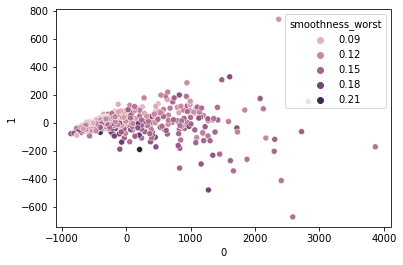

In [296]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue = df['smoothness_worst'])

<AxesSubplot:xlabel='0', ylabel='1'>

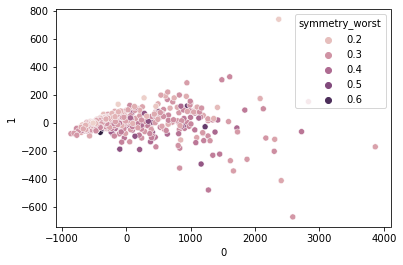

In [297]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue = df['symmetry_worst'])

<AxesSubplot:xlabel='0', ylabel='1'>

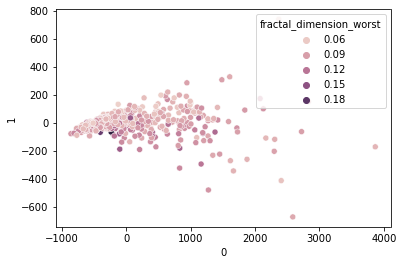

In [298]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue = df['fractal_dimension_worst'])

**Approved**: Compactness, Symmetry

**Denied**: Texture, Smoothness, Fractal Dimension

# Preprocessing

In [299]:
#imma little stuck
df_with_means = df.drop(['fractal_dimension_mean', 'fractal_dimension_worst', 'texture_mean', 'texture_worst', 'smoothness_mean', 'smoothness_worst'], axis = 1)
df_without_means = df_with_means.drop(['area_mean', "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean"], axis = 1)
df_only_means = df_with_means[['diagnosis', 'area_mean', "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean"]]

## Fixing PCA

In [300]:
Xwm = df_with_means.drop(['diagnosis'], axis = 1) #with means
Xwom = df_without_means.drop(['diagnosis'], axis = 1) #without means
Xom = df_without_means.drop(['diagnosis'], axis = 1) #only means

In [301]:
pca_wm = PCA(n_components=2)
pca_mdl_wm = pca.fit_transform(Xwm)
pca_df_wm = pd.DataFrame(pca_mdl_wm)

In [302]:
pca_wom = PCA(n_components=2)
pca_mdl_wom = pca.fit_transform(Xwom)
pca_df_wom = pd.DataFrame(pca_mdl_wom)

In [303]:
pca_om = PCA(n_components=2)
pca_mdl_om = pca.fit_transform(Xom)
pca_df_om = pd.DataFrame(pca_mdl_om)

# Modeling

## K Means

In [304]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

C:\Users\suzyc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\suzyc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\suzyc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\suzyc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

In [305]:
kmeans_wmeans = KMeans(n_clusters=2, random_state=1).fit(Xwm)
kmeans_womeans = KMeans(n_clusters=2, random_state=1).fit(Xwom)
kmeans_omeans = KMeans(n_clusters=2, random_state=1).fit(Xom)

C:\Users\suzyc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\suzyc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\suzyc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [306]:
ywm = kmeans_wmeans.fit_predict(X)
ywom = kmeans_womeans.fit_predict(X)
yom = ywom = kmeans_omeans.fit_predict(X)

C:\Users\suzyc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\suzyc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\suzyc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

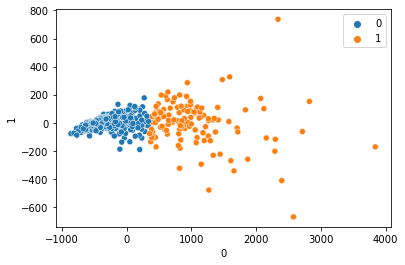

In [307]:
sns.scatterplot(x = pca_df_wm[0], y = pca_df_wm[1], hue=ywm)

<AxesSubplot:xlabel='0', ylabel='1'>

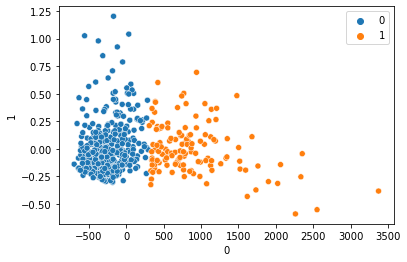

In [308]:
sns.scatterplot(x = pca_df_wom[0], y = pca_df_wom[1], hue=ywom)

<AxesSubplot:xlabel='0', ylabel='1'>

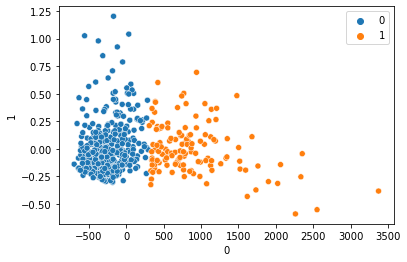

In [309]:
sns.scatterplot(x = pca_df_om[0], y = pca_df_om[1], hue=yom)

## Heirarchical

In [310]:
agglo = AgglomerativeClustering(n_clusters= 2, affinity='euclidean', linkage='ward')  
ywma = agglo.fit_predict(Xwm)
ywoma = agglo.fit_predict(Xwom)
yoma = agglo.fit_predict(Xom)

<AxesSubplot:xlabel='0', ylabel='1'>

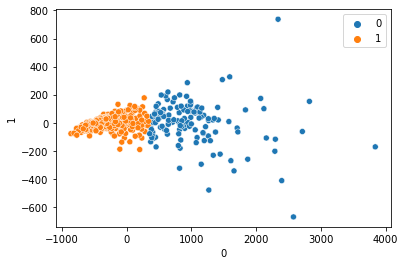

In [311]:
sns.scatterplot(x = pca_df_wm[0], y = pca_df_wm[1], hue=ywma)

<AxesSubplot:xlabel='0', ylabel='1'>

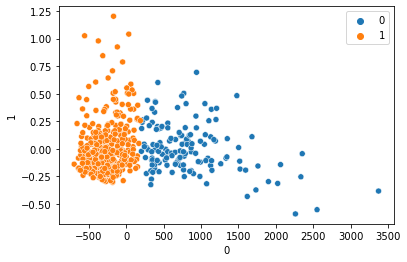

In [312]:
sns.scatterplot(x = pca_df_wom[0], y = pca_df_wom[1], hue=ywoma)

<AxesSubplot:xlabel='0', ylabel='1'>

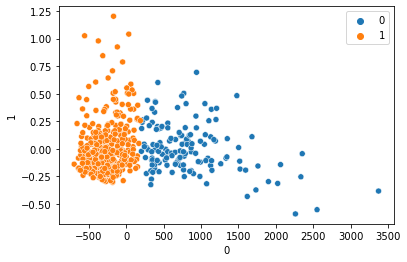

In [313]:
sns.scatterplot(x = pca_df_om[0], y = pca_df_om[1], hue=yoma)